In [1]:
# plot images
import seaborn as sns
# plot images
import matplotlib.pyplot as plt
# pandas to deal with dataframes
import pandas as pd
# to split the training data set into train and validation data
from sklearn.model_selection import train_test_split
# to make data preprocessing ==> scale training data set
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load data
airlines_df = pd.read_csv(r'data/airlines.csv')
airports_df = pd.read_csv(r'data/airports.csv')
flights_df = pd.read_csv(r'data/flights.csv')

In [3]:
airlines_df

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [4]:
airports_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [5]:
flights_df

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581741,12,31,B6,688,N657JB,LAX,BOS,320.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2611
581742,12,31,B6,745,N828JB,JFK,PSE,227.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1617
581743,12,31,B6,1503,N913JB,JFK,SJU,221.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1598
581744,12,31,B6,333,N527JB,MCO,SJU,161.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1189


In [6]:
# Convert airport codes to string to ensure consistent data type
flights_df['ORIGIN_AIRPORT'] = flights_df['ORIGIN_AIRPORT'].astype(str)
flights_df['DESTINATION_AIRPORT'] = flights_df['DESTINATION_AIRPORT'].astype(str)
airports_df['IATA_CODE'] = airports_df['IATA_CODE'].astype(str)

In [7]:
# Merge flights_df with airports_df to get airport names
flights_df = flights_df.merge(airports_df[['IATA_CODE', 'AIRPORT']], left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
flights_df = flights_df.rename(columns={'AIRPORT': 'ORIGIN_AIRPORT_NAME'})
flights_df = flights_df.drop(columns=['IATA_CODE'])

In [8]:
flights_df = flights_df.merge(airports_df[['IATA_CODE', 'AIRPORT']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
flights_df = flights_df.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_NAME'})
flights_df = flights_df.drop(columns=['IATA_CODE'])

In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
flights_df['AIRLINE'] = label_encoder.fit_transform(flights_df['AIRLINE'])
flights_df['ORIGIN_AIRPORT_NAME'] = label_encoder.fit_transform(flights_df['ORIGIN_AIRPORT_NAME'])
flights_df['DESTINATION_AIRPORT_NAME'] = label_encoder.fit_transform(flights_df['DESTINATION_AIRPORT_NAME'])

In [10]:
flights_df

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE,ORIGIN_AIRPORT_NAME,DESTINATION_AIRPORT_NAME
0,1,1,7,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773,44,108
1,1,1,8,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925,37,102
2,1,1,9,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209,96,95
3,1,1,9,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156,96,239
4,1,1,9,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318,38,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581741,12,31,2,688,N657JB,LAX,BOS,320.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2611,96,99
581742,12,31,2,745,N828JB,JFK,PSE,227.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1617,79,175
581743,12,31,2,1503,N913JB,JFK,SJU,221.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1598,79,163
581744,12,31,2,333,N527JB,MCO,SJU,161.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1189,131,163


# Data Analysis

In [11]:
# Is data has null or missing values
flights_df.isna().any()

MONTH                       False
DAY                         False
AIRLINE                     False
FLIGHT_NUMBER               False
TAIL_NUMBER                  True
ORIGIN_AIRPORT              False
DESTINATION_AIRPORT         False
SCHEDULED_TIME               True
Flight_Status               False
CANCELLATION_REASON          True
AIR_SYSTEM_DELAY             True
SECURITY_DELAY               True
AIRLINE_DELAY                True
LATE_AIRCRAFT_DELAY          True
WEATHER_DELAY                True
DISTANCE                    False
ORIGIN_AIRPORT_NAME         False
DESTINATION_AIRPORT_NAME    False
dtype: bool

In [12]:
print("\nMissing values:")
print(flights_df.isnull().sum())


Missing values:
MONTH                            0
DAY                              0
AIRLINE                          0
FLIGHT_NUMBER                    0
TAIL_NUMBER                   1428
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
SCHEDULED_TIME                   4
Flight_Status                    0
CANCELLATION_REASON         570758
AIR_SYSTEM_DELAY            445682
SECURITY_DELAY              445682
AIRLINE_DELAY               445682
LATE_AIRCRAFT_DELAY         445682
WEATHER_DELAY               445682
DISTANCE                         0
ORIGIN_AIRPORT_NAME              0
DESTINATION_AIRPORT_NAME         0
dtype: int64


In [13]:
# Handle missing values
flights_df.fillna(-1, inplace=True)

In [14]:
# Is data has null or missing values
flights_df.isna().any()

MONTH                       False
DAY                         False
AIRLINE                     False
FLIGHT_NUMBER               False
TAIL_NUMBER                 False
ORIGIN_AIRPORT              False
DESTINATION_AIRPORT         False
SCHEDULED_TIME              False
Flight_Status               False
CANCELLATION_REASON         False
AIR_SYSTEM_DELAY            False
SECURITY_DELAY              False
AIRLINE_DELAY               False
LATE_AIRCRAFT_DELAY         False
WEATHER_DELAY               False
DISTANCE                    False
ORIGIN_AIRPORT_NAME         False
DESTINATION_AIRPORT_NAME    False
dtype: bool

In [15]:
# Sample data (50% of the original data)
sampled_flights_df = flights_df.sample(frac=1, random_state=42)

In [16]:
print("Summary statistics:")
print(sampled_flights_df.describe())

Summary statistics:
               MONTH            DAY        AIRLINE  FLIGHT_NUMBER  \
count  581746.000000  581746.000000  581746.000000  581746.000000   
mean        6.523995      15.704655       6.735890    1998.553611   
std         3.405153       8.783496       4.688129    1690.845565   
min         1.000000       1.000000       0.000000       2.000000   
25%         4.000000       8.000000       3.000000     678.000000   
50%         7.000000      16.000000       7.000000    1529.000000   
75%         9.000000      23.000000      11.000000    2766.000000   
max        12.000000      31.000000      13.000000    8410.000000   

       SCHEDULED_TIME  Flight_Status  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count   581746.000000  581746.000000     581746.000000   581746.000000   
mean       143.449660       0.018888          1.234724       -0.746114   
std         84.090772       0.136130         10.380208        1.160503   
min         -1.000000       0.000000         -1.000000       -

In [17]:
sampled_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581746 entries, 187108 to 121958
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MONTH                     581746 non-null  int64  
 1   DAY                       581746 non-null  int64  
 2   AIRLINE                   581746 non-null  int32  
 3   FLIGHT_NUMBER             581746 non-null  int64  
 4   TAIL_NUMBER               581746 non-null  object 
 5   ORIGIN_AIRPORT            581746 non-null  object 
 6   DESTINATION_AIRPORT       581746 non-null  object 
 7   SCHEDULED_TIME            581746 non-null  float64
 8   Flight_Status             581746 non-null  int64  
 9   CANCELLATION_REASON       581746 non-null  object 
 10  AIR_SYSTEM_DELAY          581746 non-null  float64
 11  SECURITY_DELAY            581746 non-null  float64
 12  AIRLINE_DELAY             581746 non-null  float64
 13  LATE_AIRCRAFT_DELAY       581746 non-nu

In [18]:
sampled_flights_df.describe()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,SCHEDULED_TIME,Flight_Status,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE,ORIGIN_AIRPORT_NAME,DESTINATION_AIRPORT_NAME
count,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000,581746.000000
mean,6.523995,15.704655,6.735890,1998.553611,143.449660,0.018888,1.234724,-0.746114,3.204703,5.695094,-0.105943,875.220858,99.467369,162.627992
std,3.405153,8.783496,4.688129,1690.845565,84.090772,0.136130,10.380208,1.160503,19.458004,23.097974,9.714951,721.120140,55.713663,84.109468
min,1.000000,1.000000,0.000000,2.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,36.000000,0.000000,0.000000
25%,4.000000,8.000000,3.000000,678.000000,80.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,347.000000,47.000000,93.000000
50%,7.000000,16.000000,7.000000,1529.000000,115.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,616.000000,89.000000,169.000000
75%,9.000000,23.000000,11.000000,2766.000000,177.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1107.000000,143.000000,233.000000
max,12.000000,31.000000,13.000000,8410.000000,587.000000,1.000000,643.000000,221.000000,1323.000000,1174.000000,819.000000,4962.000000,203.000000,295.000000


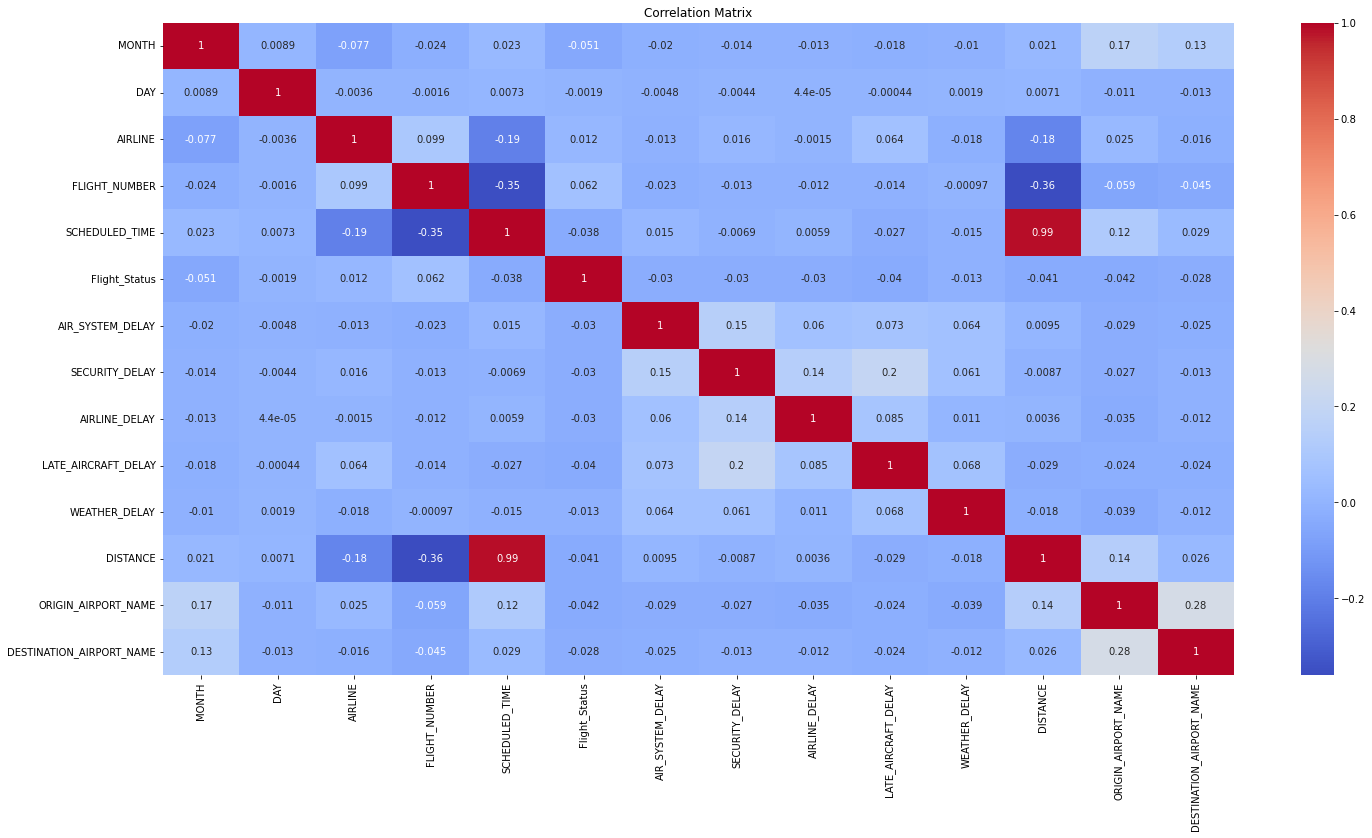

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_flights_df = sampled_flights_df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(24, 12))
sns.heatmap(numeric_flights_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Select relevant features and target variable
reduced_features = ['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT_NAME', 'DESTINATION_AIRPORT_NAME', 'SCHEDULED_TIME', 'DISTANCE']
target = 'Flight_Status'
X = sampled_flights_df[reduced_features]
y = sampled_flights_df[target]

In [21]:
y.value_counts(sort=True)

0    570758
1     10988
Name: Flight_Status, dtype: int64

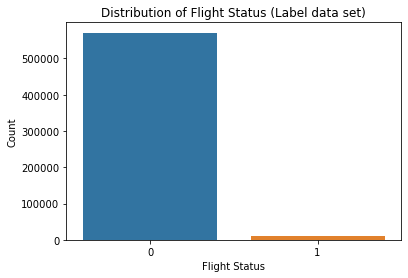

In [22]:
# Plot the distribution of Flight_Status
sns.countplot(x='Flight_Status', data=sampled_flights_df)
plt.title('Distribution of Flight Status (Label data set)')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

In [23]:
# Separate majority and minority classes
df_majority = flights_df[y == 0]
df_minority = flights_df[y == 1]

C:\Users\DELL\AppData\Local\Temp\ipykernel_17604\3425717703.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = flights_df[y == 0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_17604\3425717703.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_minority = flights_df[y == 1]


In [24]:
# Downsample majority class
df_majority_downsampled = df_majority.sample(n=10988, random_state=42)

In [25]:
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [26]:
# Separate features and target variable from the balanced dataset
X_balanced = df_balanced[reduced_features]
y_balanced = df_balanced[target]

In [27]:
y_balanced.value_counts(sort=True)

0    10988
1    10988
Name: Flight_Status, dtype: int64

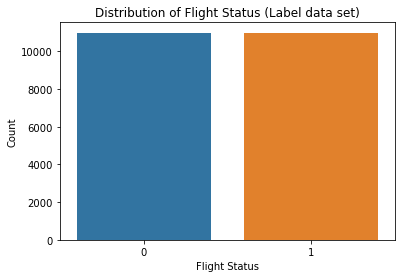

In [28]:
# Plot the distribution of Flight_Status
sns.countplot(x='Flight_Status', data=df_balanced)
plt.title('Distribution of Flight Status (Label data set)')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

In [29]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [30]:
# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [31]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model Training

In [32]:
# I will search in three linear classifiers
# 1- Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# for making classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
# 2- Support Vector Machine Classifier
from sklearn.svm import SVC
# 3- Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# For select best model
from sklearn.model_selection import GridSearchCV

In [33]:
model_params = {
    'svm':{
        'model':SVC(),
        'params':{
                'kernel': ['linear','poly'],
                'C': [1, 5, 10]
        }

    },
    'rfc':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
   'dtc':{
       'model':DecisionTreeClassifier(),
       'params':{
            'max_depth':[3,5,10],
            'criterion' : ['gini','entropy']
       }
   }

}

In [34]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [35]:
scores

[{'model': 'svm',
  'best_score': 0.6347364429275691,
  'best_params': {'C': 10, 'kernel': 'poly'}},
 {'model': 'rfc',
  'best_score': 0.7334850208570345,
  'best_params': {'n_estimators': 10}},
 {'model': 'dtc',
  'best_score': 0.7318923018581722,
  'best_params': {'criterion': 'gini', 'max_depth': 10}}]

# Choose the best model

In [36]:
# Find the best performing model
best_model_info = max(scores, key=lambda x: x['best_score'])
best_model_name = best_model_info['model']
best_model_params = best_model_info['best_params']

In [37]:
# Define the model with the best parameters
model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the Random Forest model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [38]:
model.score(X_val,y_val)

0.7290102389078499

In [39]:
# Train the Random Forest model
# Tune The model on validation data set
model.fit(X_val,y_val)

RandomForestClassifier(n_estimators=10, random_state=42)

In [40]:
model.score(X_val,y_val)

0.9840728100113766

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

In [42]:
data = {
    'Metric':['Accuracy', 'Precision', 'Recall', 'F1' ],
    'Value':[accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(data)
metrics_df

,Metric,Value
0,Accuracy,0.984073
1,Precision,0.984206
2,Recall,0.984073
3,F1,0.984073


In [43]:
print(confusion_matrix(y_val, y_pred))

[[2156   17]
 [  53 2169]]


In [44]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2173
           1       0.99      0.98      0.98      2222

    accuracy                           0.98      4395
   macro avg       0.98      0.98      0.98      4395
weighted avg       0.98      0.98      0.98      4395



In [45]:
# Predict and evaluate on test set
y_test_pred = model.predict(X_test)
test_report = classification_report(y_test, y_test_pred, target_names=['Not Cancelled', 'Cancelled'])
print("Test Report:\n", test_report)

Test Report:
                precision    recall  f1-score   support

Not Cancelled       0.67      0.73      0.70      2203
    Cancelled       0.71      0.64      0.67      2193

     accuracy                           0.69      4396
    macro avg       0.69      0.69      0.69      4396
 weighted avg       0.69      0.69      0.69      4396



In [46]:
# Function to handle new airports during inference
def encode_new_airport(airport_name, encoder):
    if airport_name not in encoder.classes_:
        return -1
    else:
        return encoder.transform([airport_name])[0]

In [47]:
# Function to handle new categories during inference
def encode_new_category(value, encoder):
    if value not in encoder.classes_:
        return -1
    else:
        return encoder.transform([value])[0]

# Prediction function
def predict_flight_cancellation(model, scaler, label_encoder, new_data):
    # Assume new_data is a DataFrame with the same columns as reduced_features
    new_data_encoded = new_data.copy()
    new_data_encoded['AIRLINE'] = new_data_encoded['AIRLINE'].apply(lambda x: encode_new_category(x, label_encoder))
    new_data_encoded['ORIGIN_AIRPORT_NAME'] = new_data_encoded['ORIGIN_AIRPORT_NAME'].apply(lambda x: encode_new_category(x, label_encoder))
    new_data_encoded['DESTINATION_AIRPORT_NAME'] = new_data_encoded['DESTINATION_AIRPORT_NAME'].apply(lambda x: encode_new_category(x, label_encoder))

    # Handle any -1 values in the encoded data (which represent unknown categories)
    new_data_encoded.fillna(-1, inplace=True)

    # Scale the features
    new_data_scaled = scaler.transform(new_data_encoded)

    # Predict using the trained model
    predictions = model.predict(new_data_scaled)

    return predictions

# Example usage
new_data = pd.DataFrame({
    'MONTH': [6],
    'DAY': [15],
    'AIRLINE': ['AS'],
    'ORIGIN_AIRPORT_NAME': ['Seattle Tacoma International'],
    'DESTINATION_AIRPORT_NAME': ['Los Angeles International'],
    'SCHEDULED_TIME': [150],
    'DISTANCE': [954]
})

predictions = predict_flight_cancellation(model, scaler, label_encoder, new_data)
print(f"Prediction for new data: {predictions}")

Prediction for new data: [1]
